In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data = pd.read_csv('/content/archive.zip')
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [5]:
print(data.isnull().sum())

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [6]:
data.dropna(subset=['Country'], inplace=True)
print(data.isnull().sum())

Country               0
City                  1
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64


In [7]:
X = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].values
y = data['AQI Value'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6027.6431 - mae: 55.9079 - val_loss: 176.3460 - val_mae: 7.3401
Epoch 2/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 92.1378 - mae: 5.8366 - val_loss: 65.4086 - val_mae: 4.1234
Epoch 3/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52.0715 - mae: 3.8389 - val_loss: 48.9639 - val_mae: 3.2923
Epoch 4/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 31.5966 - mae: 2.8822 - val_loss: 42.1109 - val_mae: 2.6407
Epoch 5/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 26.5795 - mae: 2.4517 - val_loss: 36.5499 - val_mae: 2.2670
Epoch 6/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 19.5765 - mae: 2.0672 - val_loss: 34.6524 - val_mae: 2.0978
Epoch 7/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.7116 - mae: 1.9471 - val_loss: 34.6284 - val_mae: 1.8546
Epoch 8/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.0291 - mae: 1.6362 - val_loss: 31.2079 - val_mae: 1.9226
Epoch 9/50
461/461 ━━━━━━━━━━━━━━━━━

In [13]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.2303 - mae: 0.9567
Test Mean Absolute Error: 0.91


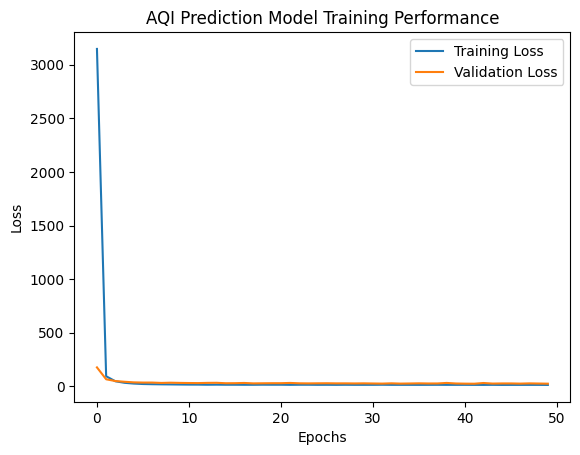

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('AQI Prediction Model Training Performance')
plt.legend()
plt.show()

In [15]:
predictions = model.predict(X_test)
predictions

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[40.12265 ],
       [53.72741 ],
       [37.484627],
       ...,
       [69.49752 ],
       [48.181602],
       [39.70513 ]], dtype=float32)

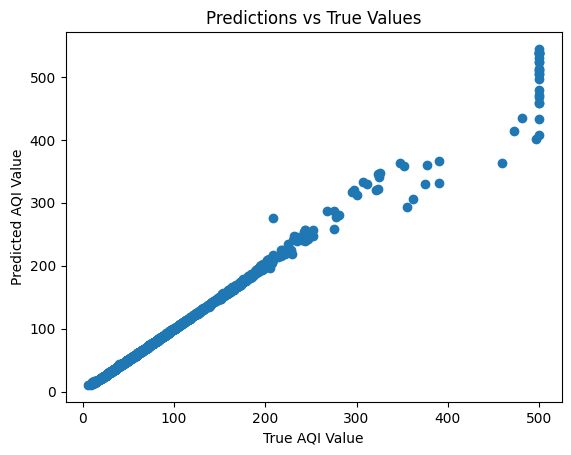

In [16]:
plt.scatter(y_test, predictions)
plt.xlabel('True AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Predictions vs True Values')
plt.show()